<a href="https://colab.research.google.com/github/fleshgordo/dataexploration/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration with pandas

# Introduction to Pandas in Python

Pandas is a powerful and flexible Python library used for data manipulation and analysis. This handbook is designed to help you understand and master the fundamental concepts and operations of Pandas, making your data analysis tasks more efficient and insightful. And hopefully more fun.

## What Will You Learn?

- **Basics of Pandas**: Understand the core structures of Pandas.
- **Data Manipulation**: Learn how to manipulate data in DataFrames including sorting, filtering, and aggregating data.
- **Data Cleaning**: Techniques to handle missing data, remove duplicates, and fix data inconsistencies.
- **Data Visualization**: Introduction to plotting with Pandas and its integration with Matplotlib for visual data analysis.

## Basic dataset

# OECD data

Before we start we need to download the CSV files into our temporary drive. By executing following line you'll download all csv files

In [ ]:
!wget -O example.zip "https://file.notion.so/f/f/659f465d-0798-4891-947e-eb3c9eb44269/a78ea5f0-3159-46b0-adb1-b2df0b5bef7b/Konkurrenzfahigkeit_der_Westlichen_Balkanstaaten_Datensatz_(240826).zip?table=block&id=1b4f89e0-45c9-4bdc-986c-32a973c53f96&spaceId=659f465d-0798-4891-947e-eb3c9eb44269&expirationTimestamp=1725552000000&signature=Di1ECehHUAkvqZhIkd-mqzZF6YkVo8hIch4TZzyEWgc&downloadName=Konkurrenzfa%CC%88higkeit+der+Westlichen+Balkanstaaten+Datensatz+%28240826%29.zip"
!unzip example.zip

--2024-09-05 06:53:45--  https://file.notion.so/f/f/659f465d-0798-4891-947e-eb3c9eb44269/a78ea5f0-3159-46b0-adb1-b2df0b5bef7b/Konkurrenzfahigkeit_der_Westlichen_Balkanstaaten_Datensatz_(240826).zip?table=block&id=1b4f89e0-45c9-4bdc-986c-32a973c53f96&spaceId=659f465d-0798-4891-947e-eb3c9eb44269&expirationTimestamp=1725552000000&signature=Di1ECehHUAkvqZhIkd-mqzZF6YkVo8hIch4TZzyEWgc&downloadName=Konkurrenzfa%CC%88higkeit+der+Westlichen+Balkanstaaten+Datensatz+%28240826%29.zip
Resolving file.notion.so (file.notion.so)... 18.160.10.87, 18.160.10.101, 18.160.10.42, ...
Connecting to file.notion.so (file.notion.so)|18.160.10.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16881 (16K) [application/zip]
Saving to: ‘example.zip’

example.zip         100%[===================>]  16.49K  --.-KB/s    in 0s      

2024-09-05 06:53:45 (131 MB/s) - ‘example.zip’ saved [16881/16881]

Archive:  example.zip
  inflating: dimensions_labels.csv   
  inflating: __MACOSX/._dimensio

Explanation:

`!` allows you to run shell commands in Colab notebooks.
`-O example.zip` specifies the output filename as example.zip.

with `!unzip` we extract the zip file immediately after download.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/dimensions_scores_historic.csv')

One of the core data structures in pandas is the DataFrame, which can be thought of as a table of data, with rows and columns.

A **DataFrame** is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is similar to a SQL table or an Excel spreadsheet. We store the dataframe in a variable called `df`


In [ ]:
df

,key,economy,year,score
0,INVESTMENT,ALB,2018,2.60
1,INVESTMENT,ALB,2021,3.10
2,INVESTMENT,ALB,2024,3.63
3,INVESTMENT,BIH,2018,2.10
4,INVESTMENT,BIH,2021,2.70
...,...,...,...,...
310,TOURISM,SRB,2021,2.30
311,TOURISM,SRB,2024,2.80
312,TOURISM,WB6_AVG,2018,1.70
313,TOURISM,WB6_AVG,2021,2.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      315 non-null    object 
 1   economy  315 non-null    object 
 2   year     315 non-null    int64  
 3   score    315 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.0+ KB


#### Exercise
Try loading outer CSV files by changing the filename or creating more dataframe variables

## Labels versus scores

Let's import labels and scores seperately

In [ ]:
# Load labels
dimensions_labels = pd.read_csv('dimensions_labels.csv')
economies_labels = pd.read_csv('economies_labels.csv')
indicators_labels = pd.read_csv('indicators_labels.csv')
subdimensions_labels = pd.read_csv('subdimensions_labels.csv')

# Load scores
dimensions_scores = pd.read_csv('dimensions_scores.csv')
indicators_scores = pd.read_csv('indicators_scores.csv')
subdimensions_scores = pd.read_csv('subdimensions_scores.csv')


In [ ]:
dimensions_scores

In [ ]:
dimensions_merged = pd.merge(dimensions_scores, dimensions_labels, on='key', how='left')
dimensions_merged

## Visualising

For plotting data we need to use an additional library. [Matplot](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) are popular python libraries to visualise data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set_theme()

In [ ]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='economy', y='score', hue='year', data=df, errorbar=None)

In [ ]:
unique_keys = df['key'].unique()
for key in unique_keys:
    plt.figure(figsize=(10, 6))
    subset = df[df['key'] == key]
    sns.barplot(x='economy', y='score', hue='year', data=subset, palette='viridis')
    plt.title(f'Scores by Country for {key} in 2024')
    plt.xlabel('Country')
    plt.ylabel('Score')
    plt.legend(title='Year')
    plt.show()

In [ ]:
g = sns.catplot(
    x='economy',
    y='score',
    hue='year',
    col='key',
    data=df,
    kind='bar',
    col_wrap=3,  # Adjust based on how many plots you want per row
    height=5,
    aspect=1.5,
    palette='viridis'
)
g.set_titles("{col_name}")
g.set_axis_labels("economy", "Score")
g.add_legend(title='Year')
plt.show()

### plotly

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Create a bar chart
fig = px.bar(df, x='economy', y='score', color='economy',facet_col='key',facet_row='year',title='test')

# Show the plot
fig.show()

In [ ]:
# Create a faceted line plot to visualize the trend of scores for each economy (country) over the years, separated by the 'key' column.
fig = px.line(df,
              x='year',
              y='score',
              color='economy',
              facet_col='key',
              markers=True,
              facet_col_wrap=5,
              title='Country Scores by Year, Separated by Key Category',
              labels={'economy': 'Country', 'score': 'Score', 'year': 'Year'})

# Show the plot
fig.show()

In [ ]:
# Let's first load the subdimensions_labels.csv file to inspect its contents and see how we can merge it with the existing subdimensions_scores data.

# Load the subdimensions labels CSV
labels_df = pd.read_csv('/content/subdimensions_labels.csv')

# Display the first few rows of the labels DataFrame to inspect
labels_df.head()

subdimensions_df = pd.read_csv('/content/subdimensions_scores.csv')


In [ ]:
labels_df

,key,label
0,INVESTMENT_S01,Investment policy framework
1,INVESTMENT_S02,Investment promotion and facilitation
2,INVESTMENT_S03,Mobilising sustainable investment
3,TRADE_S01,Trade policy framework
4,TRADE_S02,Digital trade
5,TRADE_S03,Export promotion
6,FINANCE_S01,Bank financing framework
7,FINANCE_S02,Access to alternative financing sources
8,FINANCE_S03,Digital finance
9,TAX_S01,Tax policy framework


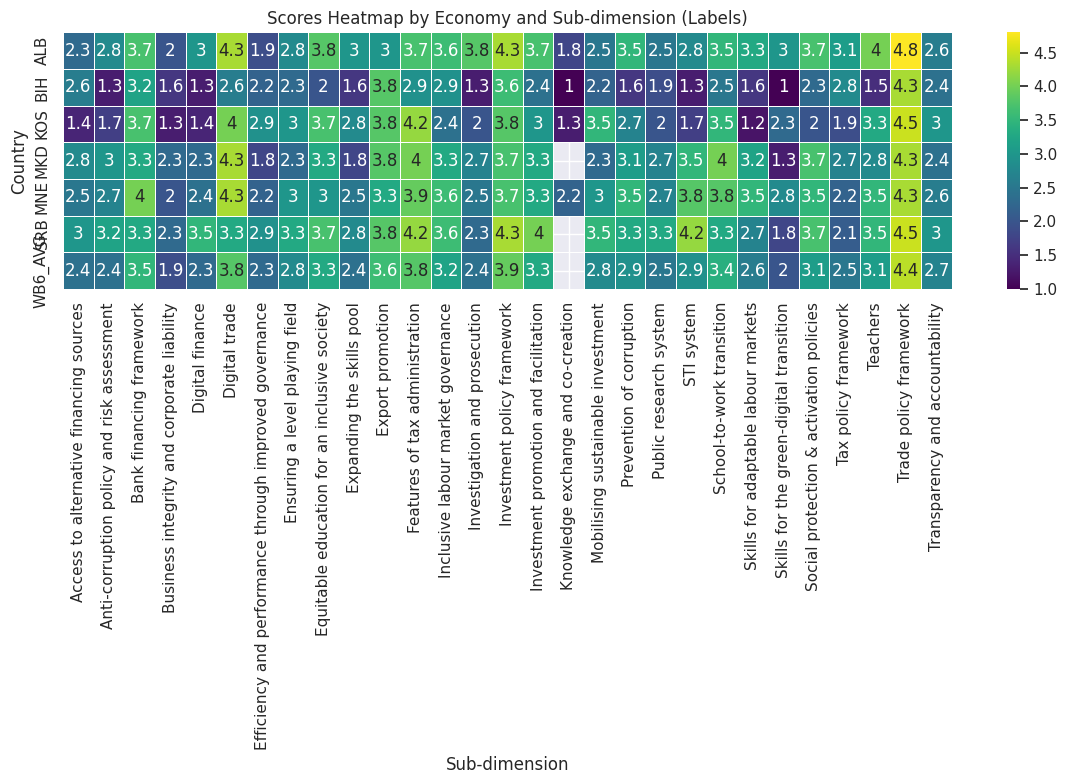

In [ ]:
# Merge the subdimensions_scores and labels dataframes based on the 'key' column
merged_df = pd.merge(subdimensions_df, labels_df, on='key', how='left')

# Create a pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = merged_df.head(200).pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_with_labels, annot=True, cmap='viridis', linewidths=.5)
plt.title('Scores Heatmap by Economy and Sub-dimension (Labels)')
plt.xlabel('Sub-dimension')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
merged_df

,key,economy,year,score,label
0,INVESTMENT_S01,ALB,2024,4.3,Investment policy framework
1,INVESTMENT_S01,BIH,2024,3.6,Investment policy framework
2,INVESTMENT_S01,KOS,2024,3.8,Investment policy framework
3,INVESTMENT_S01,MNE,2024,3.7,Investment policy framework
4,INVESTMENT_S01,MKD,2024,3.7,Investment policy framework
...,...,...,...,...,...
345,TOURISM_S03,KOS,2024,1.5,Sustainable and competitive tourism
346,TOURISM_S03,MNE,2024,4.2,Sustainable and competitive tourism
347,TOURISM_S03,MKD,2024,1.4,Sustainable and competitive tourism
348,TOURISM_S03,SRB,2024,2.3,Sustainable and competitive tourism


In [ ]:
# prompt: Using dataframe merged_df: filter for key that contains DIGITAL and 2024

# Filter for keys containing "DIGITAL"
filtered_df = merged_df[merged_df['key'].str.contains('DIGITAL')]

# Filter for the year 2024
filtered_df = filtered_df[filtered_df['year'] == 2024]


In [ ]:
# Check for any missing scores in the merged DataFrame
missing_scores = merged_df.isnull().sum()

# Check how many unique sub-dimension labels are present and how many are missing
unique_labels = merged_df['label'].nunique()
missing_scores, unique_labels, merged_df['label'].unique()

(key        0
 economy    0
 year       0
 score      0
 label      0
 dtype: int64,
 49,
 array(['Investment policy framework',
        'Investment promotion and facilitation',
        'Mobilising sustainable investment', 'Trade policy framework',
        'Digital trade', 'Export promotion', 'Bank financing framework',
        'Access to alternative financing sources', 'Digital finance',
        'Tax policy framework', 'Features of tax administration',
        'Efficiency and performance through improved governance',
        'Transparency and accountability',
        'Ensuring a level playing field',
        'Anti-corruption policy and risk assessment',
        'Prevention of corruption',
        'Business integrity and corporate liability',
        'Investigation and prosecution',
        'Equitable education for an inclusive society', 'Teachers',
        'School-to-work transition',
        'Skills for the green-digital transition',
        'Inclusive labour market governance',
    

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create the pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = merged_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=heatmap_data_with_labels.values,
                   x=heatmap_data_with_labels.columns,
                   y=heatmap_data_with_labels.index,
                   #colorscale='Viridis',
                   hoverongaps=False,  # Show hover info even on gaps
                   showscale=True))  # Show color scale bar

# Set title and axis labels
fig.update_layout(
    title='Interactive Heatmap: Country Scores by Sub-dimension',
    #xaxis_nticks=50,
    xaxis_title='Sub-dimension',
    yaxis_title='Country',
)

# Show the interactive plot
fig.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for a specific sub-dimension (e.g., DIGITAL)
subdimension_key = 'DIGITAL'
filtered_df = merged_df[merged_df['key'].str.startswith(subdimension_key)]

# Example: We'll aggregate the scores for one year (you can change this as needed)
year_of_interest = 2024
filtered_year_df = filtered_df[filtered_df['year'] == year_of_interest]

# Pivot the data to have economies as rows and subdimension categories as columns
pivot_data = filtered_year_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')

# Select one country for demonstration (e.g., the first country)
example_country = pivot_data.index[0]
scores = pivot_data.loc[example_country]

scores

,ALB
key,
DIGITAL_S01,3.2
DIGITAL_S02,2.5
DIGITAL_S03,2.3
DIGITAL_S04,2.8


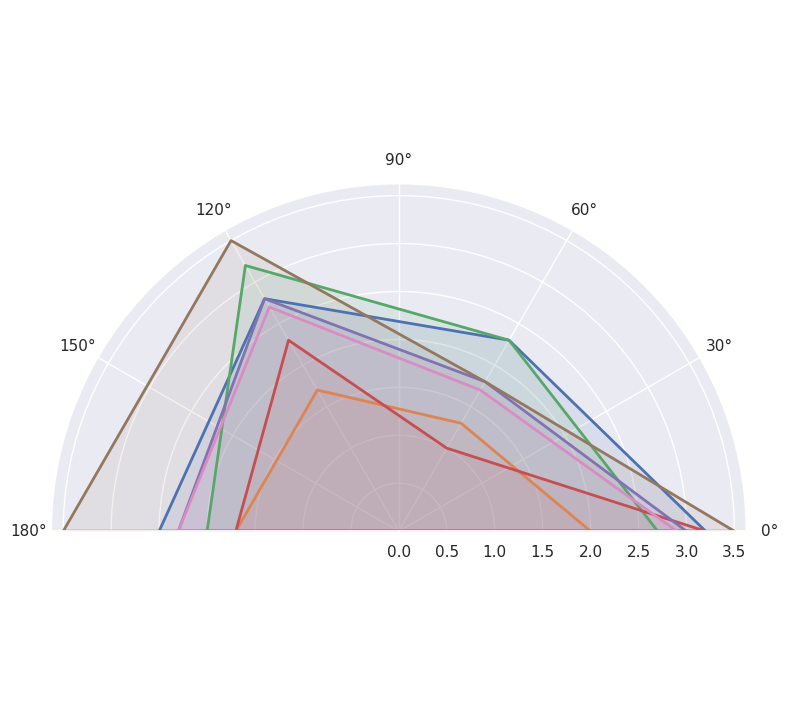

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for a specific sub-dimension (e.g., DIGITAL)
subdimension_key = 'DIGITAL'
filtered_df = merged_df[merged_df['key'].str.startswith(subdimension_key)]

# Example: We'll aggregate the scores for one year (you can change this as needed)
year_of_interest = 2024
filtered_year_df = filtered_df[filtered_df['year'] == year_of_interest]

# Pivot the data to have economies as rows and subdimension categories as columns
pivot_data = filtered_year_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Prepare the radar chart
categories = pivot_data.columns
N = len(categories)

# Compute the angle for each category
angles = np.linspace(0, np.pi, N, endpoint=True).tolist()
# Complete the loop for radar by repeating the first category
angles += angles[:1]
#print(filtered_year_df)
#print(pivot_data)
# Set up the radar chart in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data for each country
for i, country in enumerate(pivot_data.index):
    scores = pivot_data.loc[country].values
    scores = np.concatenate((scores, [scores[0]]))  # Close the loop for the radar chart

    ax.fill(angles, scores, alpha=0.1)  # Fill the area
    ax.plot(angles, scores, linewidth=2, label=country)  # Plot the outline for each country

# Set the category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)

# Set the title
ax.set_title(f'Radar Chart for {subdimension_key} Sub-dimensions ({year_of_interest})')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_thetamax(180)
# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
merged_df

,key,economy,year,score,label
0,INVESTMENT_S01,ALB,2024,4.3,Investment policy framework
1,INVESTMENT_S01,BIH,2024,3.6,Investment policy framework
2,INVESTMENT_S01,KOS,2024,3.8,Investment policy framework
3,INVESTMENT_S01,MNE,2024,3.7,Investment policy framework
4,INVESTMENT_S01,MKD,2024,3.7,Investment policy framework
...,...,...,...,...,...
345,TOURISM_S03,KOS,2024,1.5,Sustainable and competitive tourism
346,TOURISM_S03,MNE,2024,4.2,Sustainable and competitive tourism
347,TOURISM_S03,MKD,2024,1.4,Sustainable and competitive tourism
348,TOURISM_S03,SRB,2024,2.3,Sustainable and competitive tourism
